Since 2002, the World Happiness Report has used statistical analysis to determine the world's happiest countries. In this notebook I'll perform some EDA on Happiness ranking dataset. and in next two I'll perform feature engineering & Machine learning.

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')


# for ignoring any unwanted warning
import warnings
warnings.filterwarnings('ignore')

# for ignoring any unwanted warning
import warnings
warnings.filterwarnings('ignore')

# set style for the plots
sns.set_theme(style="darkgrid")

In [2]:
# import data
df = pd.read_csv('Happiness.csv')
df.head() # Viewing the first 5 rows of the dataset

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
df.tail() # Viewing the last 5 rows of the dataset

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [4]:
df.shape

(158, 12)

In [5]:
# viewing basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

### EDA

In [6]:
# Checking null values
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [7]:
# Let's see some statistics related to the dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,158.0,79.493671,45.754363,1.00000,40.250000,79.500000,118.750000,158.00000
Happiness Score,158.0,5.375734,1.145010,2.83900,4.526000,5.232500,6.243750,7.58700
Standard Error,158.0,0.047885,0.017146,0.01848,0.037268,0.043940,0.052300,0.13693
Economy (GDP per Capita),158.0,0.846137,0.403121,0.00000,0.545808,0.910245,1.158448,1.69042
Family,158.0,0.991046,0.272369,0.00000,0.856823,1.029510,1.214405,1.40223
Health (Life Expectancy),158.0,0.630259,0.247078,0.00000,0.439185,0.696705,0.811013,1.02525
Freedom,158.0,0.428615,0.150693,0.00000,0.328330,0.435515,0.549092,0.66973
Trust (Government Corruption),158.0,0.143422,0.120034,0.00000,0.061675,0.107220,0.180255,0.55191
Generosity,158.0,0.237296,0.126685,0.00000,0.150553,0.216130,0.309883,0.79588
Dystopia Residual,158.0,2.098977,0.553550,0.32858,1.759410,2.095415,2.462415,3.60214


Here we can see that "Happniess Rank" has a mean of 79.49 with a standard deviation of 45.75. So we can say that here is a large deviation among the countries of the world. But in case of "Happiness Score" the mean is 5.37 with a standard deviation of 1.145 which is ok.

In [8]:
# Now let's find how many regions are there and which region has how many data points
df['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

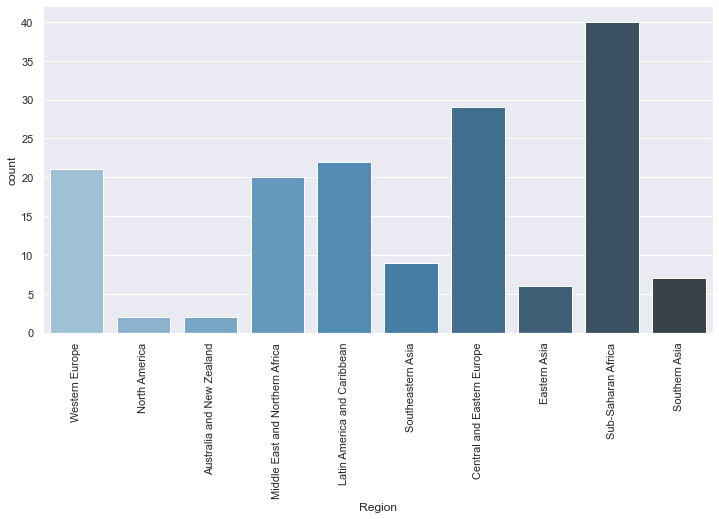

In [9]:
# Let's use a countplot to see visually
plt.figure(figsize = (12,6))
sns.countplot(data = df, x = 'Region', palette="Blues_d")
plt.xticks(rotation = 90)
plt.show()

We can see that "Sub-Saharan Africa", "Central Eastern Eqrope" has maximum counted value.

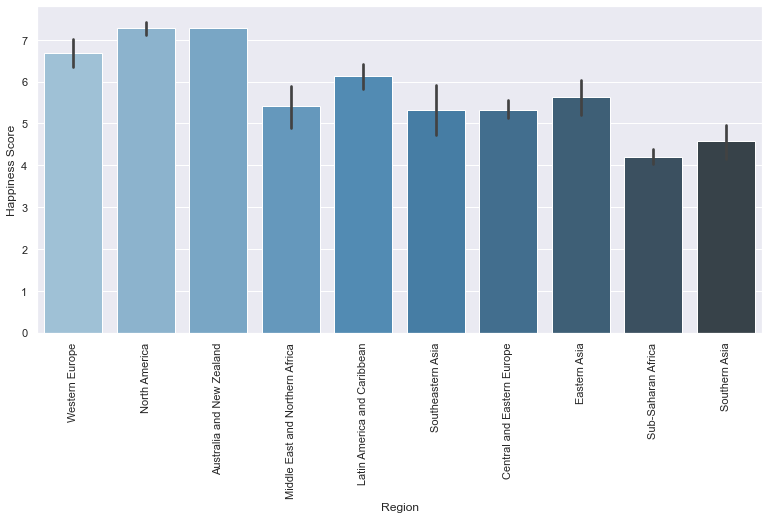

In [10]:
# let's visualize which region's people have the highest happiness score

plt.figure(figsize = (13,6))
sns.barplot(data = df, x = 'Region', y = 'Happiness Score',  palette="Blues_d")
plt.xticks(rotation = 90)
plt.show()

Here we can see that "Western Europe" "North America" "Australia & New Zealand" has highest happiness score

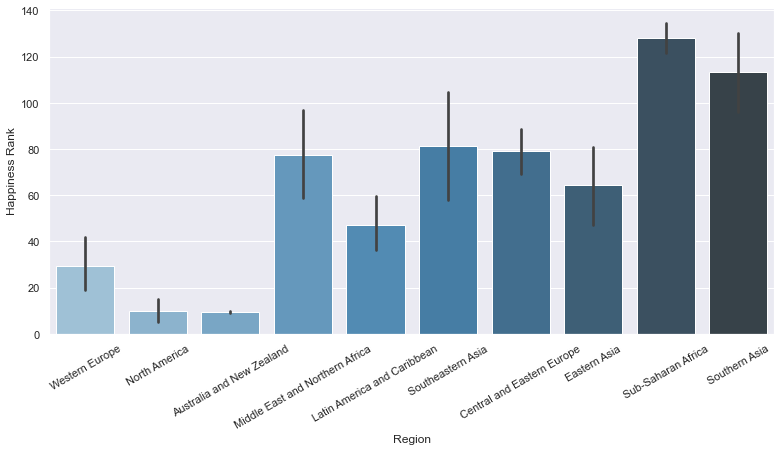

In [11]:
# let's see which region has the highest rank on the dataset
plt.figure(figsize = (13,6))
sns.barplot(data = df, x = 'Region', y = 'Happiness Rank',  palette="Blues_d")
plt.xticks(rotation = 30)
plt.show()

Here "sub-saharan Africa" & "Southern Asia" has good happiness rank still  "Western Europe" "North America" "Australia & New Zealand" has highest happiness score

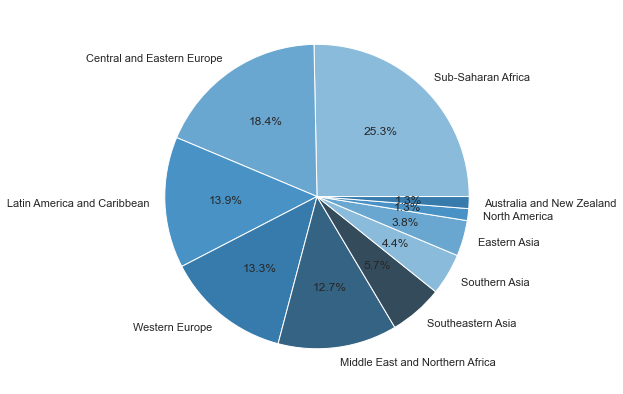

In [12]:
# let's use a pie plot to understand which region has how much percentage
plt.figure(figsize=(15,7))
colors = sns.color_palette('Blues_d')[0:11]
plt.pie(df['Region'].value_counts(), labels = df['Region'].value_counts().keys(), autopct='%0.1f%%', colors = colors)
plt.show()

<Figure size 1080x648 with 0 Axes>

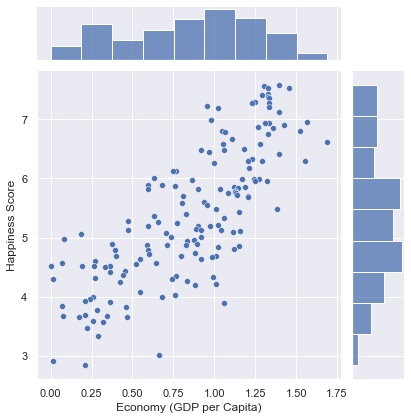

In [13]:
# let's check happiness based on GDP
plt.figure(figsize = (15,9))
sns.jointplot(x = df['Economy (GDP per Capita)'], y = df['Happiness Score'], palette= 'Blues_d')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel(('Happiness Score'))
plt.show()

Here we can see that the 'Happiness score' has a linear relationship with GDP

In [14]:
# Let's check for other depended variable
# For this let's create a function so that it can be easier

def var_vs_hs(var):
    plt.figure(figsize = (15,7))
    sns.jointplot(x = var, y = df['Happiness Score'], palette= 'Blues_d')
    plt.show()

<Figure size 1080x504 with 0 Axes>

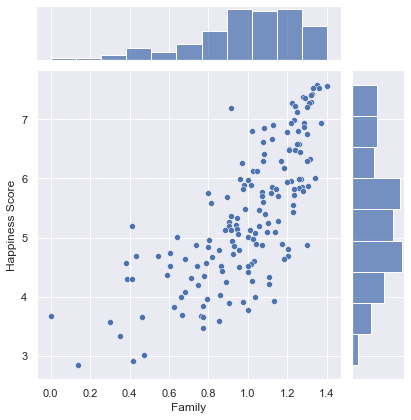

In [15]:
# Family vs Happiness Score
var_vs_hs(df['Family'])

Here we can see that the 'Happiness score' has a linear relationship with Family

<Figure size 1080x504 with 0 Axes>

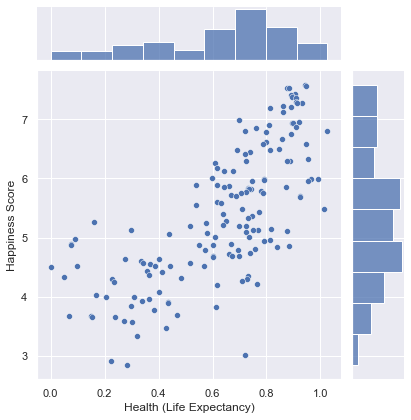

In [16]:
# Health (Life Expectancy vs Happiness score
var_vs_hs(df['Health (Life Expectancy)'])

Here we can see that the 'Happiness score' has a linear relationship with Life expectancy

<Figure size 1080x504 with 0 Axes>

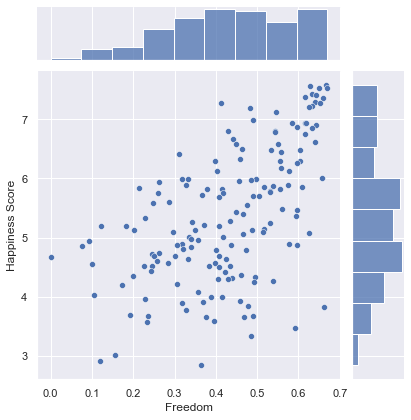

In [17]:
# Freedom vs Happiness Score
var_vs_hs(df['Freedom'])

Here we can see that the 'Happiness score' has not well linear relationship with freedom

<Figure size 1080x504 with 0 Axes>

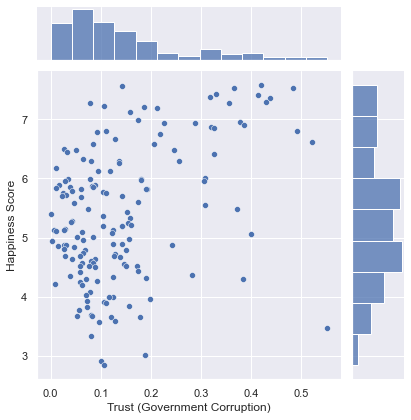

In [18]:
# checking Trust (Government Corruption vs happiness score
var_vs_hs(df['Trust (Government Corruption)'])

Here Trust on government  has not a linear relationship.

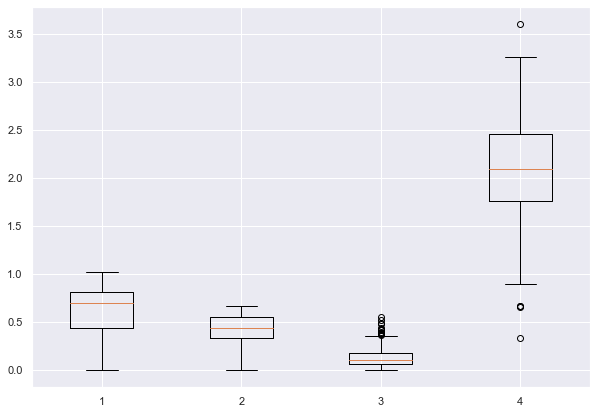

In [19]:
# let's check the outliers for the dataset

plt.figure(figsize = (10,7))
data = [df['Health (Life Expectancy)'], df['Freedom'], df['Trust (Government Corruption)'], df['Dystopia Residual']]

plt.boxplot(data)
plt.show()

Here we've some outlier in 'Trust (Government Corruption)', 'Dystopia Residual' columns. will take care later

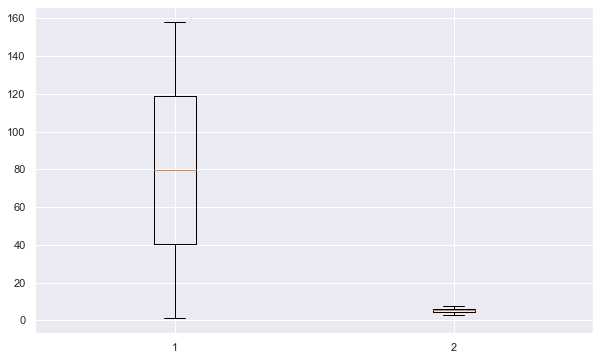

In [20]:
# let's find if there is any outlier for happiness rank and score

plt.figure(figsize = (10,6))
data_score = [df['Happiness Rank'], df['Happiness Score']]
plt.boxplot(data_score)
plt.show()

Here no outlier is detected and it is obvious because the score and rank are done within a specific number.

here we can see that the 'Happiness score' is not linearly related with happiness score. we can also see that most of the countries people doesn't trust on their government, mostly those countris who has the happiness score between 4 to 6

<Figure size 432x360 with 0 Axes>

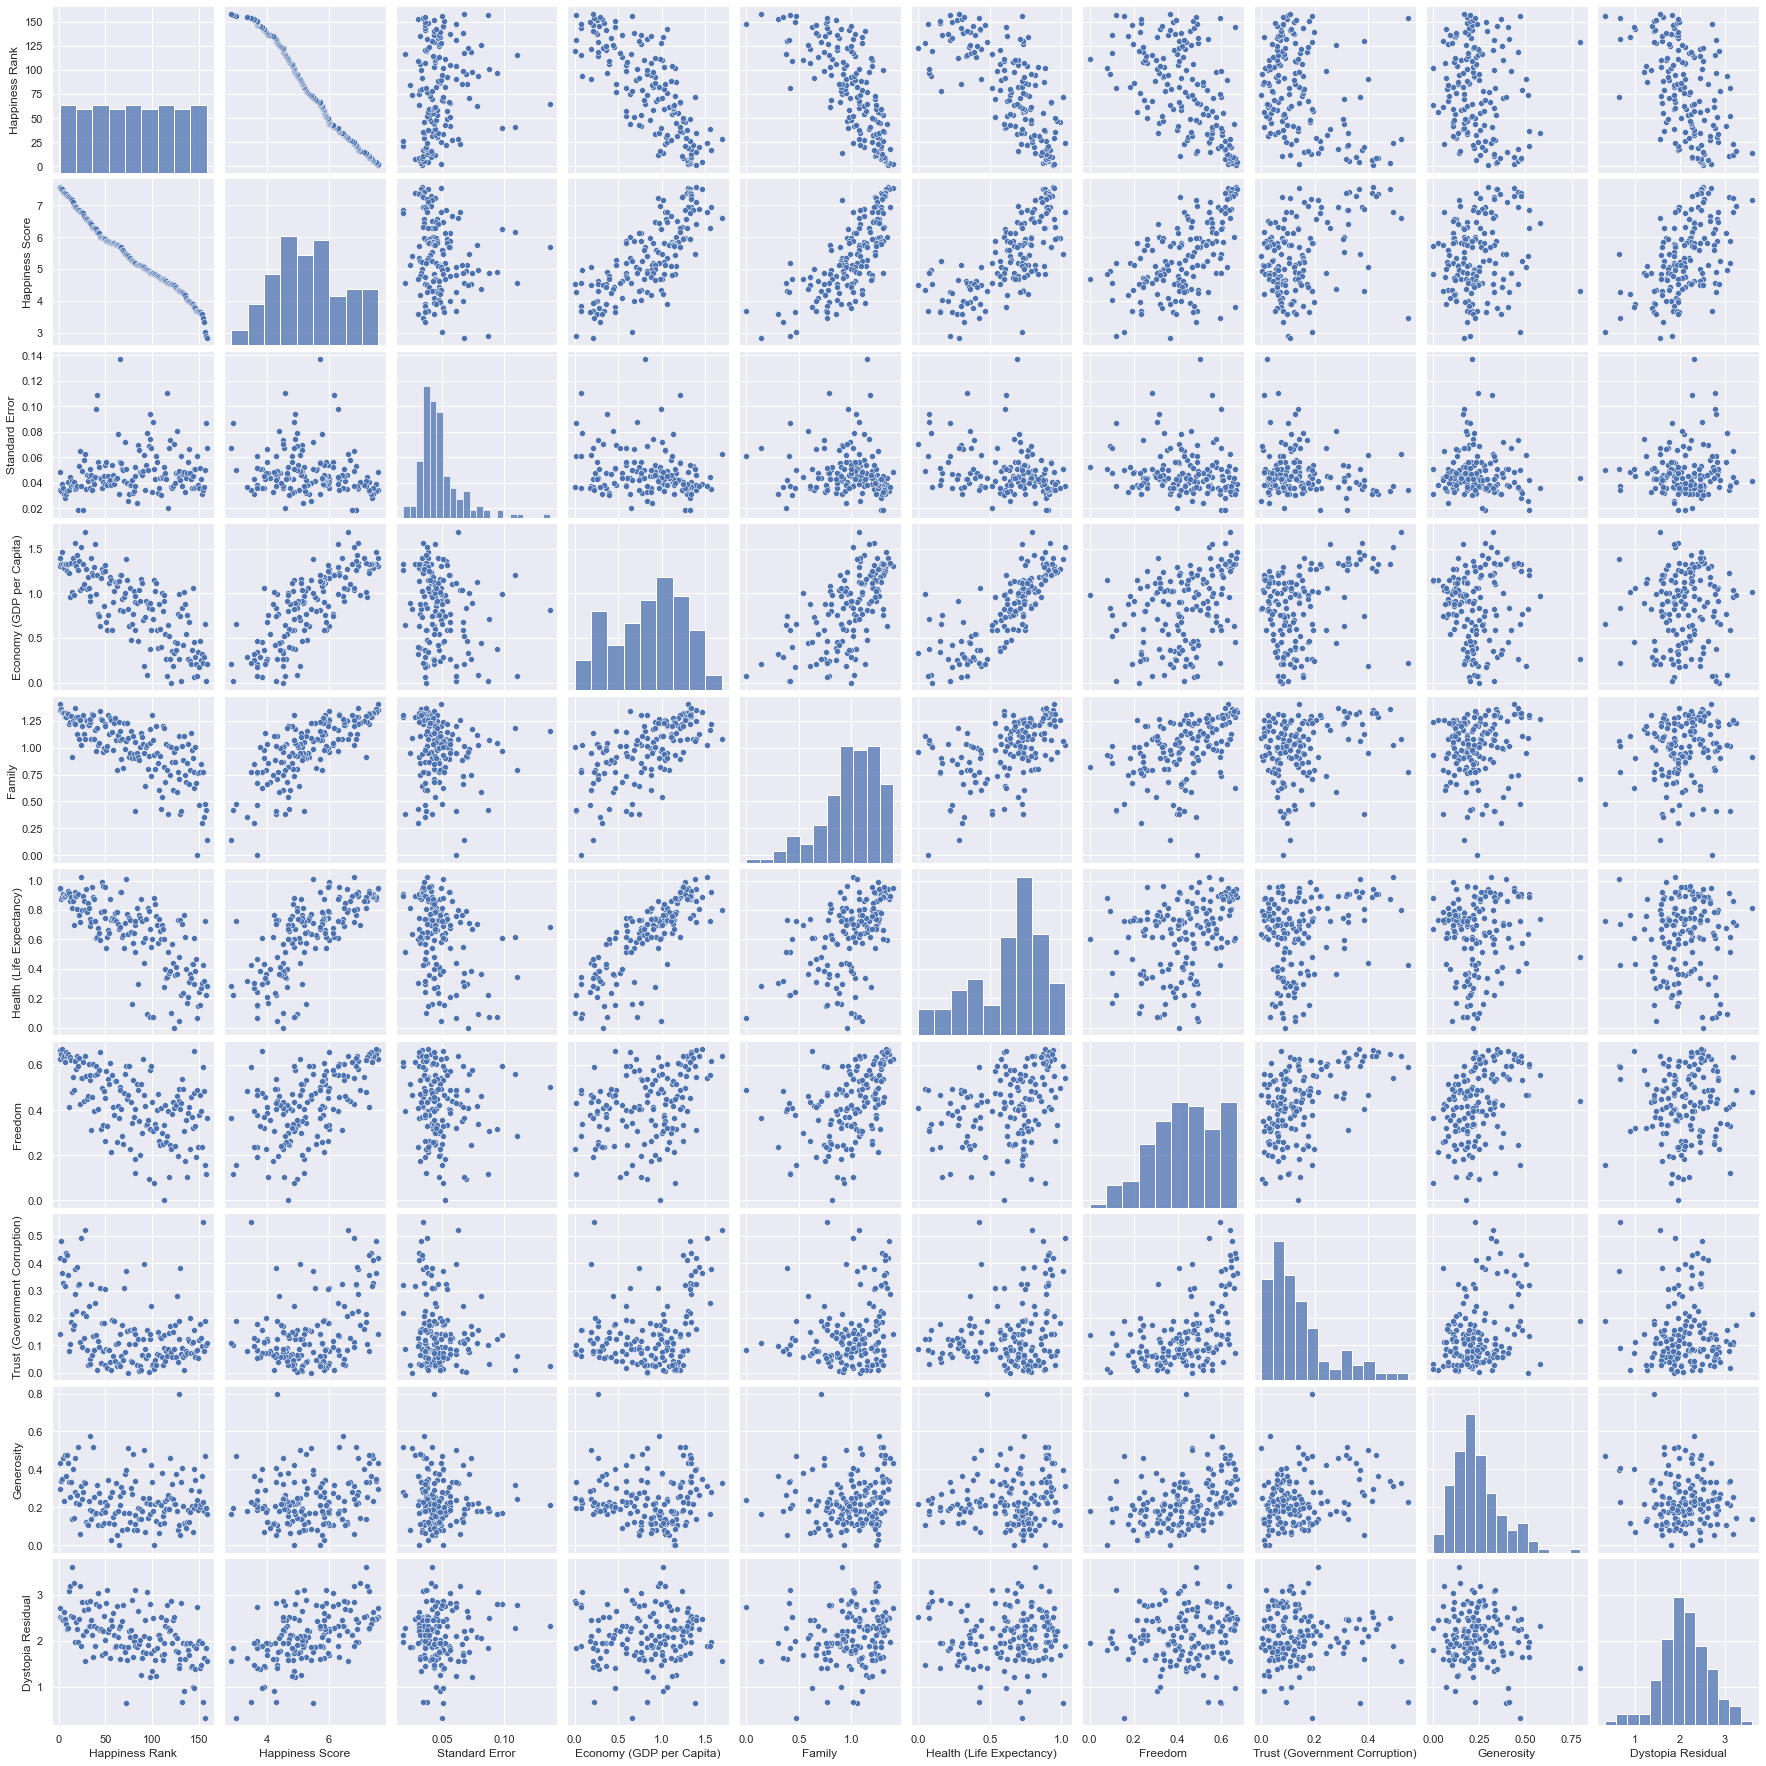

In [21]:
# Now let's use a pair plot and heatmap to understand the whole dataset at a glance
plt.figure(figsize=(6,5))
sns.pairplot(df)
plt.show()

Here we can see that some of the features has positive linear relationship and some of has negative linear relationship. Some of the features are normally distriibuted and some of are skewed distributed. We'll use log transformation for those later.

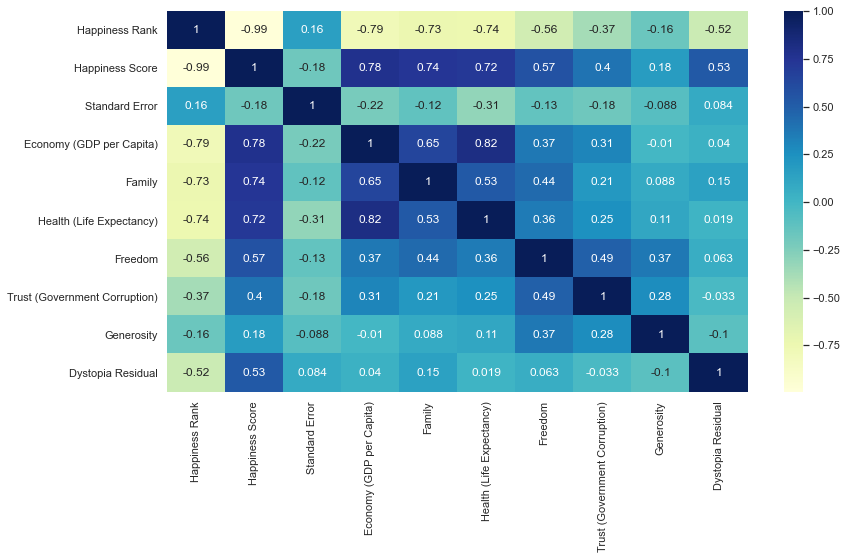

In [22]:
# Now let's use a heatmap to find the correlation of the features
plt.figure(figsize = (13,7))
corr_df = df.corr()
sns.heatmap(corr_df, annot= True, cmap= 'YlGnBu')
plt.show()

Here we can see some of the variable in this dataset is highhly correlated with other variables. Which may cause multicoloniarity. and this may effect the performance of the model. So, some of these variable might be dropped. We'll use p-value to do that.

###### Thus We've completed the EDA part. Next will do some feature engineering.